In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import iminuit
import dynesty

from scipy import stats, optimize
from astropy.stats import poisson_conf_interval

# Large Counts Limit

We begin by merely loading the data, which are of the format of binned counts. We also provide the perfectly known background model and the signal template. Specifically, under the hypothesis of a signal amplitude `A`, the data are realized as a poisson draw by
\begin{equation}
\mathbf{data}_i \sim \mathrm{Poisson}(\mathbf{bkg}_i + A \mathbf{sig}_i)
\end{equation}
Our goal it to estimate the amplitude with which the signal template is realized in the data. The data in this example are realized with sufficiently large amplitude that the Poisson distribution is well-approximated by a Gaussian distribution.

In [2]:
data_dict = np.load('./Data/HighCountsLimit.npz')

bin_centers = data_dict["bin_centers"]
bkg = data_dict["background"]
sig = data_dict['signal_template']
data = data_dict['data']

# Errorbars from frequentist confidence intervals on poisson distributions
lower, upper = poisson_conf_interval(data, interval = 'frequentist-confidence')

#### First, a quick look at the data

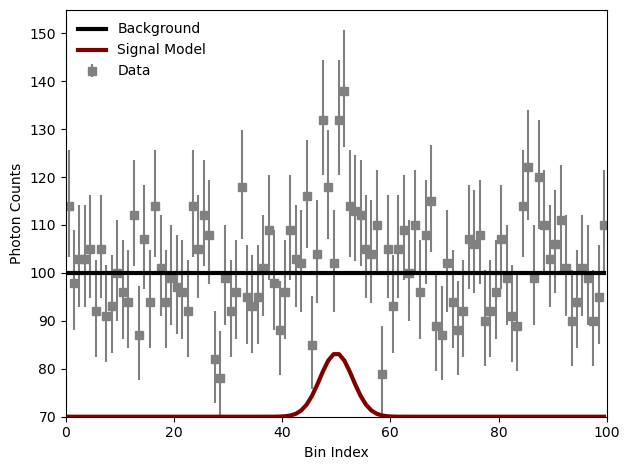

In [3]:
plt.errorbar(bin_centers, data, yerr = (data-lower, upper-data), fmt = 's', color = "grey", label = 'Data')
plt.plot(bin_centers, bkg, color = 'black', lw = 3, zorder = np.inf, label = 'Background')
plt.plot(bin_centers, 70+100*sig, color = 'maroon', lw = 3, zorder = np.inf, label = 'Signal Model')
plt.legend(frameon= False, loc = 'upper left')
plt.ylim(70, None)
plt.xlabel('Bin Index')
plt.ylabel('Photon Counts')
plt.xlim(0,100)
plt.tight_layout()

### Here I provide some useful methods

1. The gaussian likelihood of `data` given signal amplitude parameter`A`
2. A method which makes data realizations of the model with fixed background and signal determined by signal amplitude `A`. This will be useful for generating monte carlo realizations

In [4]:
def gaussian_likelihood(A):
    return np.sum(stats.norm.logpdf(data, loc = A*sig + bkg, scale = np.sqrt( A*sig + bkg)))

def make_fake_data(A):
    return stats.poisson.rvs(A*sig + bkg)

### Bayesian Scenario

Your task: Decide on a prior for the `A` that you think is sensible, then use the `dynesty` code package to develop a posterior for `A`.

### Frequentist Point Estimate

Determine the maximum likelihood estimate of $\hat{A}$.

### Frequentist Interval Construction

Using the Wilk's theorem result for the asymptotic distribution of the likelihood ratio `t(A)`, determine 68% and 95% confidence intervals on`A` given the `data`.

### Frequentist Interval Construction

Using a Monte Carlo procedure, perform the Neyman construction for the 68% and 95% central confidence intervals on `A` given the `data`. Compare these results to those obtained by the asymptotic approximation in the previous exercise.

# Small Counts Limit

Now let's repeat the exercise, but instead we will use some data which is very much in the non-gaussian limit. We wil have to use the proper poisson likelihood.

In [5]:
def poisson_likelihood(data, A):
    return np.sum(stats.poisson.logpmf(data, A*sig + bkg))

In [6]:
data_dict = np.load('./Data/LowCountsLimit.npz')

bin_centers = data_dict["bin_centers"]
bkg = data_dict["background"]
sig = data_dict['signal_template']
data = data_dict['data']

# Errorbars from frequentist confidence intervals on poisson distributions
lower, upper = poisson_conf_interval(data, interval = 'frequentist-confidence')

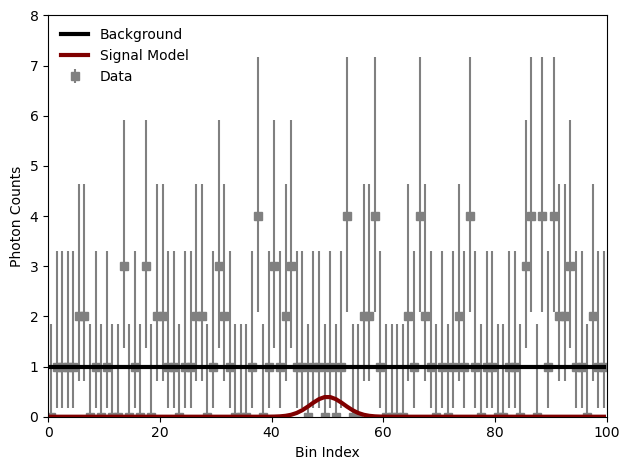

In [7]:
plt.errorbar(bin_centers, data, yerr = (data-lower, upper-data), fmt = 's', color = "grey", label = 'Data')
plt.plot(bin_centers, bkg, color = 'black', lw = 3, zorder = np.inf, label = 'Background')
plt.plot(bin_centers, 3*sig, color = 'maroon', lw = 3, zorder = np.inf, label = 'Signal Model')
plt.legend(frameon= False, loc = 'upper left')
plt.ylim(0, 8)
plt.xlabel('Bin Index')
plt.ylabel('Photon Counts')
plt.xlim(0,100)
plt.tight_layout()